In [5]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [28]:
''' 
    iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
'''
def reduce_mem_usage(train_data):
    start_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train_data.columns:
        col_type = train_data[col].dtype
        
        if col_type not in [object, 'category']:
            c_min = train_data[col].min()
            c_max = train_data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_data[col] = train_data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_data[col] = train_data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_data[col] = train_data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_data[col] = train_data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train_data[col] = train_data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_data[col] = train_data[col].astype(np.float32)
                else:
                    train_data[col] = train_data[col].astype(np.float64)
        else:
            train_data[col] = train_data[col].astype('category')
    end_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train_data

# Annotate text on graph
def annotate_text(p, append_to_text='%'):
    for p in ax.patches:
        txt = str(p.get_height().round(2)) + append_to_text
        txt_x = p.get_x() + p.get_width()/2.
        txt_y = 0.92*p.get_height()
        ax.text(txt_x,txt_y,txt, fontsize=20, color='#004235', ha='center', va='bottom')

In [29]:
aisles      = pd.read_csv("data/aisles.csv")
aisles = reduce_mem_usage(aisles)
departments = pd.read_csv("data/departments.csv")
departments = reduce_mem_usage(departments)
prior_order = pd.read_csv("data/order_products__prior.csv")
prior_order = reduce_mem_usage(prior_order)
train_order = pd.read_csv("data/order_products__train.csv")
train_order = reduce_mem_usage(train_order)
orders      = pd.read_csv("data/orders.csv")
orders = reduce_mem_usage(orders)
products     = pd.read_csv("data/products.csv")
products = reduce_mem_usage(products)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.01 MB
Decreased by -159.9%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by -92.7%
Memory usage of dataframe is 989.82 MB
Memory usage after optimization is: 340.25 MB
Decreased by 65.6%
Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 13.20 MB
Decreased by 68.7%
Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 45.68 MB
Decreased by 75.0%
Memory usage of dataframe is 1.52 MB
Memory usage after optimization is: 1.91 MB
Decreased by -25.8%


In [30]:
## understanding data

In [31]:
print('aisles shape :', aisles.shape)
aisles.head(5)

aisles shape : (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [32]:
print('departments shape :',departments.shape)
departments.head(5)

departments shape : (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [33]:
print('prior_order shape :', prior_order.shape)
prior_order.head(5)

prior_order shape : (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [34]:
print('train_order shape :', train_order.shape)
train_order.head(5)

train_order shape : (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [35]:
print('orders shape :', orders.shape)
orders.head(5)

orders shape : (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [36]:
print('products shape :', products.shape)
products.head(5)

products shape : (49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [38]:
## Data Preprocessing
print("="*10 + "aisles.csv" + "="*10)
print(aisles.isnull().sum(axis = 0))
print()

print("="*10 + "departments.csv" + "="*10)
print(departments.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__prior.csv" + "="*10)
print(prior_order.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__train.csv" + "="*10)
print(train_order.isnull().sum(axis = 0))
print()

print("="*10 + "orders.csv" + "="*10)
print(orders.isnull().sum(axis = 0))
print()

print("="*10 + "products.csv" + "="*10)
print(products.isnull().sum(axis = 0))
print()

==========aisles.csv==========
aisle_id    0
aisle       0
dtype: int64

==========departments.csv==========
department_id    0
department       0
dtype: int64

==========order_products__prior.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========order_products__train.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========orders.csv==========
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

==========products.csv==========
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



In [39]:
## merging data

In [40]:
#merge order_products__prior and order_products__train

prior_train_orders = pd.concat([prior_order, train_order]).sort_values(by=['order_id'])
print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(5)

Shape of prior_train_orders : (33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0


In [41]:
#merge prior_train_orders and products

prior_train_orders = pd.merge(left = prior_train_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(5)

Shape of prior_train_orders : (33819106, 7)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
2,1,13176,6,0,Bag of Organic Bananas,24,4
3,1,47209,7,0,Organic Hass Avocado,24,4
4,1,22035,8,1,Organic Whole String Cheese,21,16


In [42]:
#merge prior_train_orders and aisles

prior_train_orders = pd.merge(left = prior_train_orders, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(5)

Shape of prior_train_orders : (33819106, 8)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits
2,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese
3,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables


In [43]:
#merge prior_train_orders and departments

prior_train_orders = pd.merge(left = prior_train_orders, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(5)

Shape of prior_train_orders : (33819106, 9)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce


In [44]:
#merge prior_train_orders with orders
# since orders have all prior/train/test data, we will merge only prior and train orders for EDA , but leave test orders untouched

prior_train_orders = pd.merge(left = prior_train_orders, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape :", prior_train_orders.shape)
prior_train_orders.head(5)

Shape : (33819106, 15)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0


In [93]:
col_order = ['user_id',
 'order_id',
 'product_id',
  'aisle_id',
 'department_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle',
 'department',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

prior_train_orders = prior_train_orders[col_order]
prior_train_orders.head(5)

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
2,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0


In [46]:
## how many users
print("Total Users :",prior_train_orders['user_id'].nunique())
print("Users in train :",prior_train_orders[prior_train_orders['eval_set']=='train']['user_id'].nunique())
print("Users in test :",orders[orders['eval_set']=='test']['user_id'].nunique())

Total Users : 206209
Users in train : 131209
Users in test : 75000


In [47]:
## how many orders place by every user

orders_count = orders.groupby(['user_id'])['order_id'].agg(lambda group: len(group.unique()))\
                .reset_index(name='order_count')\
                .set_index('user_id')

In [48]:
print("Minimum orders per user :",orders_count['order_count'].min())
print("Maximum orders per user :",orders_count['order_count'].max())

Minimum orders per user : 4
Maximum orders per user : 100


In [49]:
##How many Orders with no reordered products 

orders_count = prior_train_orders.groupby(['order_id'])['reordered'].sum().reset_index(name = 'counts')
order_with_reordered_items , order_with_no_reordered_items= sum(orders_count['counts']!=0) , sum(orders_count['counts']==0)

#order_with_reordered_items/ total unique orders
print('Orders with reordered items :',order_with_reordered_items/prior_train_orders['order_id'].nunique())
print('Orders with no reordered items :',order_with_no_reordered_items/prior_train_orders['order_id'].nunique())

Orders with reordered items : 0.8813194412690899
Orders with no reordered items : 0.11868055873091014


In [50]:
print("There are total {} different products ".format(prior_train_orders['product_name'].nunique()))

There are total 49685 different products 


In [51]:
## frequently order product
df = prior_train_orders.groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'order_rate').sort_values(by ='order_rate', ascending = False)
df['order_rate'] = df['order_rate']/prior_train_orders['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,order_rate
product_name,
Banana,0.14683
Bag of Organic Bananas,0.11803
Organic Strawberries,0.08236
Organic Baby Spinach,0.07522
Organic Hass Avocado,0.06601
...,...
Brut Prosecco,0.00000
7.04 Oz. Grahamfuls Banana Vanilla 8ct,0.00000
Unpeeled Apricot Halves in Heavy Syrup,0.00000


Text(0.5, 1.0, 'Frequently ordered product')

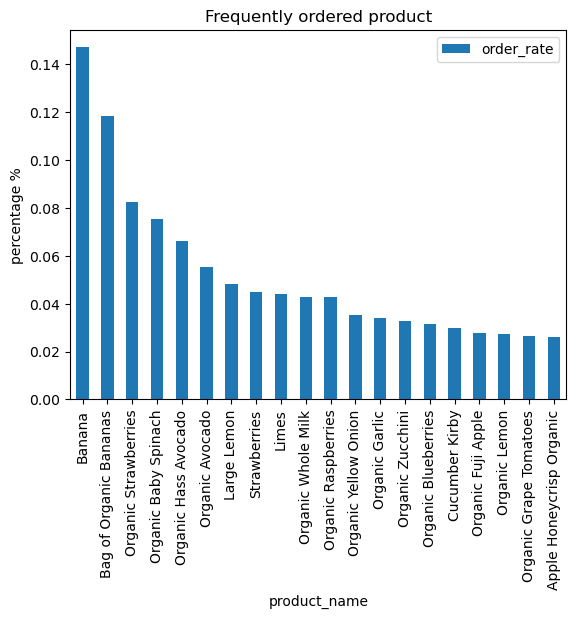

In [52]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently ordered product')

In [53]:
## Frequently reordered product 

df = prior_train_orders[prior_train_orders['reordered'] ==1].groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'reorder_rate').sort_values(by ='reorder_rate', ascending = False)
df['reorder_rate'] = df['reorder_rate']/prior_train_orders[prior_train_orders['reordered'] ==1]['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,reorder_rate
product_name,
Banana,0.14078
Bag of Organic Bananas,0.11166
Organic Strawberries,0.07272
Organic Baby Spinach,0.06610
Organic Hass Avocado,0.05974
...,...
Fresh Collection Denali Scent Deodorant,0.00000
Black Food Color,0.00000
Organic Steel Cut Oats Hot Cereal,0.00000


Text(0.5, 1.0, 'Frequently reordered product')

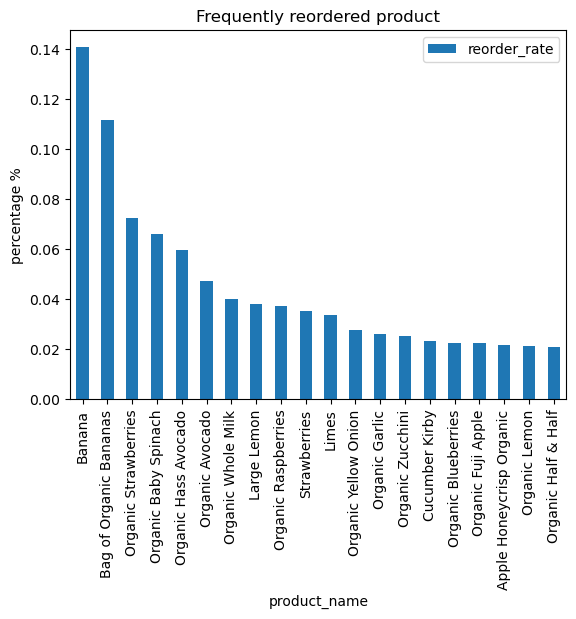

In [54]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product')

In [56]:
#department

print("There are total {} different departments ".format(prior_train_orders['department'].nunique()))

There are total 21 different departments 


In [ ]:
# count of products in each department
prod_dept = products.merge(departments, on='department_id', how='left')
data = prod_dept.groupby(['department']).agg({'product_id':'count'}).reset_index().rename(columns={'product_id':'products_count'})
plt.pie(data['products_count'], labels = data['department'], autopct='%.0f%%', radius=1.7)
plt.title('count of products in each department')
plt.show()

In [ ]:
# From All ordered products, the count of contribution of each department
total_ordered_products = prior_train_orders.shape[0]
groupeddf = prior_train_orders.groupby(['department'], as_index=False).count().rename(columns={'department_id':'count_of_ordered_prods'})

fig = plt.figure(figsize = (20, 5))
plt.pie(groupeddf['count_of_ordered_prods'], labels = groupeddf['department'], autopct='%.0f%%', radius=1.7)
plt.title('% of purchases across each department')
plt.show()

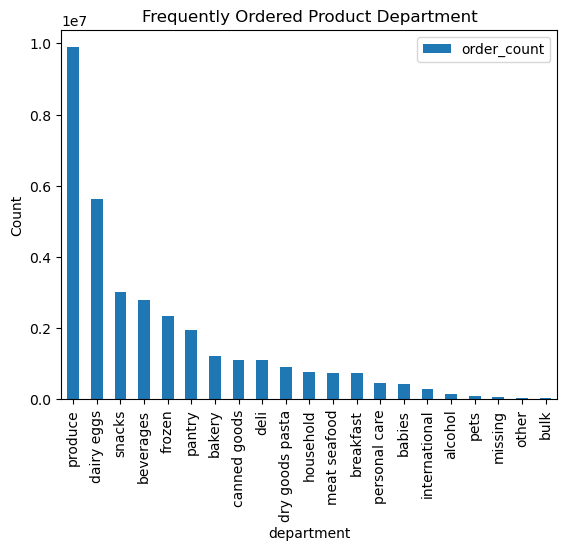

In [57]:
# frequently order product department
# Prepare Data
df = prior_train_orders.groupby(['department']).size().reset_index(name='order_count')
dept_reorder_rate = prior_train_orders[prior_train_orders['reordered']==1].groupby(['department']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = dept_reorder_rate['reorder_rate']/df['order_count']

ax = df[['department','order_count']].sort_values(by='order_count', ascending = False).plot.bar(x = 'department', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Department')
ax.legend()

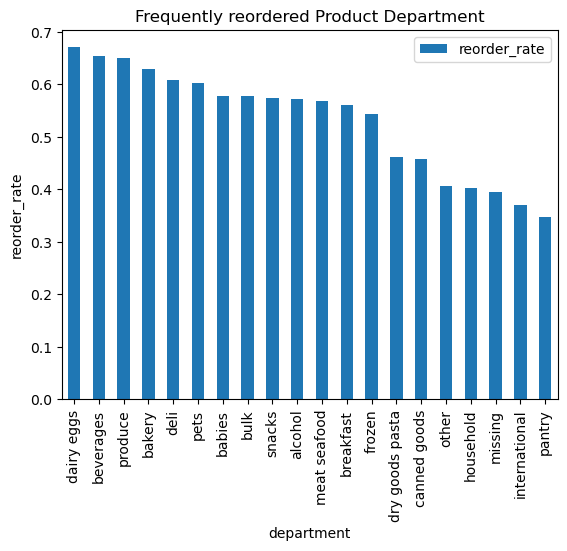

In [58]:
# top 20 Department based on their reorder rate

ax = df[['department','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'department', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Department')
ax.legend()

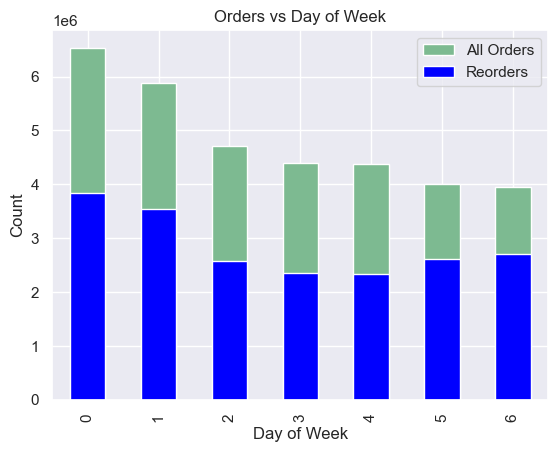

In [59]:
# how many products were ordered and reordered on a particular day of week

sns.set_theme(context='notebook', style='darkgrid', palette="crest")
ax = prior_train_orders['order_dow'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_dow']).size().plot.bar(color = 'b')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Count")
ax.set_title(' products were ordered and reordered on a particular day of week')
ax.legend(["All Orders", "Reorders"])

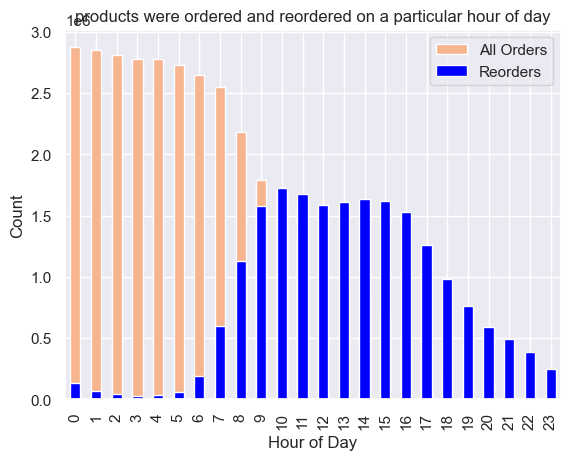

In [60]:
#how many products were ordered and reordered on a particular hour of day

sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
ax = prior_train_orders['order_hour_of_day'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_hour_of_day']).size().plot.bar(color = 'b')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")
ax.set_title('products were ordered and reordered on a particular hour of day')
ax.legend(["All Orders", "Reorders"])

In [61]:
# other insights
#products which were never ordered

products[(~products.product_name.isin(prior_train_orders.product_name))]

,product_id,product_name,aisle_id,department_id
3629,3630,Protein Granola Apple Crisp,57,14
7044,7045,Unpeeled Apricot Halves in Heavy Syrup,88,13
46624,46625,Single Barrel Kentucky Straight Bourbon Whiskey,31,7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


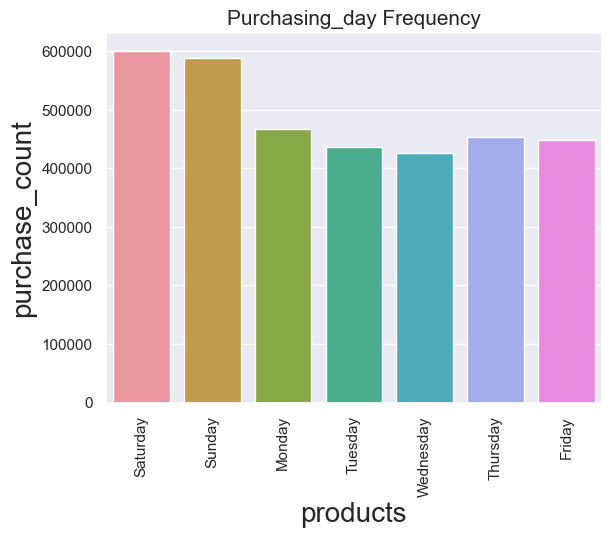

In [64]:
purchase_day = orders.order_dow.value_counts().sort_index()
sns.barplot(purchase_day.index,purchase_day.values)
plt.title('Purchasing_day Frequency',fontsize=15)
plt.xticks(ticks=purchase_day.index,rotation='vertical',labels=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.xlabel('products',fontsize=20)
plt.ylabel('purchase_count',fontsize=20)
plt.show()

In [65]:
## From the above plot we can see that week_days like saturday and sunday also friday purchase frequency are high

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


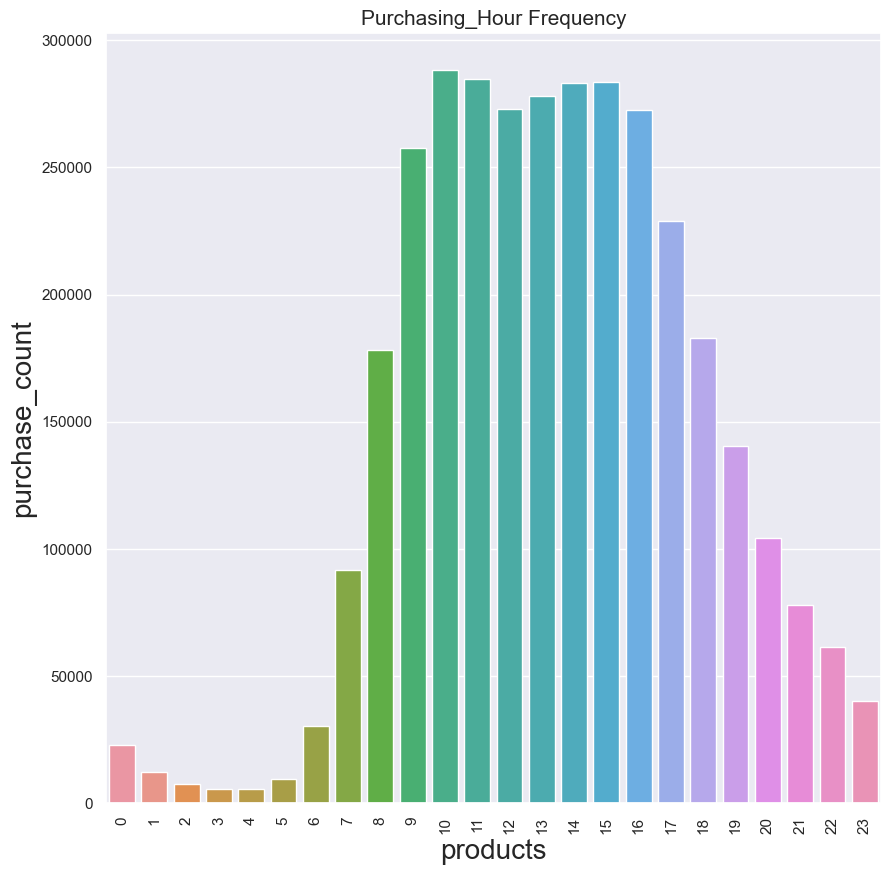

In [66]:
Count_hour = orders.order_hour_of_day.value_counts().sort_index()
plt.figure(figsize=(10,10))
sns.barplot(Count_hour.index,Count_hour.values)
plt.title('Purchasing_Hour Frequency',fontsize=15)
plt.xticks(ticks=Count_hour.index,rotation='vertical')
plt.xlabel('products',fontsize=20)
plt.ylabel('purchase_count',fontsize=20)
plt.show()

In [ ]:
## From above plot we can see that the peak hours are 8 to 16 and 18 to 23 are medium and 0 to 5 are very low frequency of orders getting from users

In [69]:
product = []
count =[]
hours = []
for i in tqdm(prior_train_orders.order_hour_of_day.unique()):
    product.append(prior_train_orders[prior_train_orders.order_hour_of_day==i]['product_name'].value_counts().index[0])
    count.append(prior_train_orders[prior_train_orders.order_hour_of_day==i]['product_name'].value_counts().values[0])
    hours.append(i)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.94it/s]


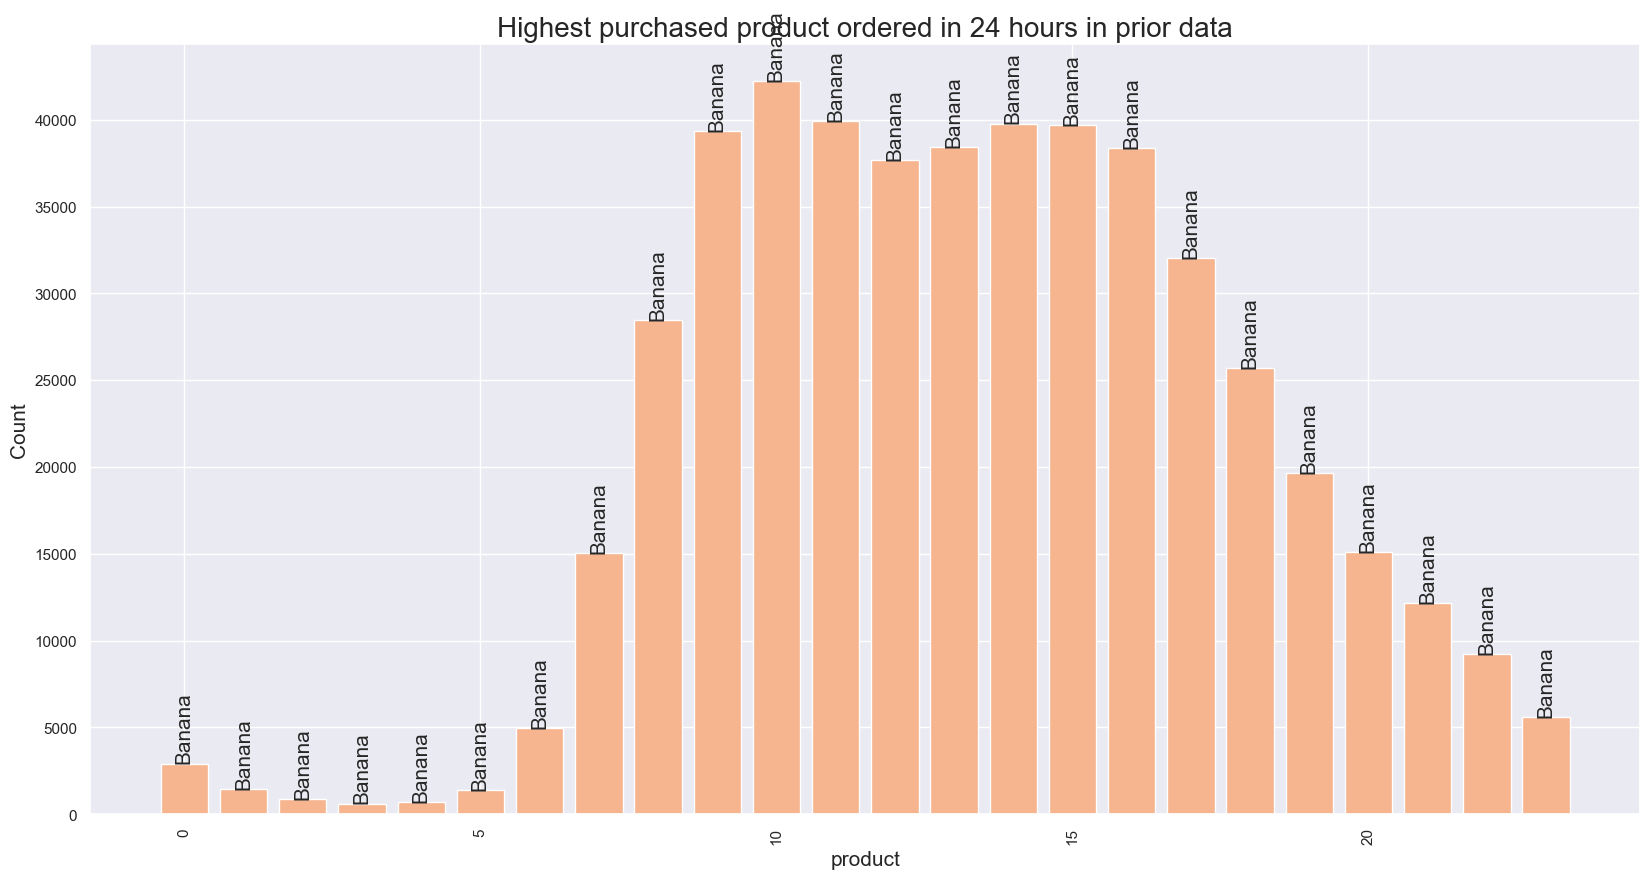

In [70]:
plt.figure(figsize=(20,10))
bar=plt.bar(hours,count)
plt.title("Highest purchased product ordered in 24 hours in prior data",fontsize=20)
plt.xlabel("product",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation='vertical')
i=0
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,product[i], ha='center', va='bottom',rotation=90,fontsize=15)
    i=i+1

In [71]:
product = []
count = []
day = []

for i in tqdm(prior_train_orders.order_dow.unique()):
    product.append(prior_train_orders[prior_train_orders.order_dow==i]['product_name'].value_counts().index[0])
    count.append(prior_train_orders[prior_train_orders.order_dow==i]['product_name'].value_counts().values[0])
    day.append(i)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.15it/s]


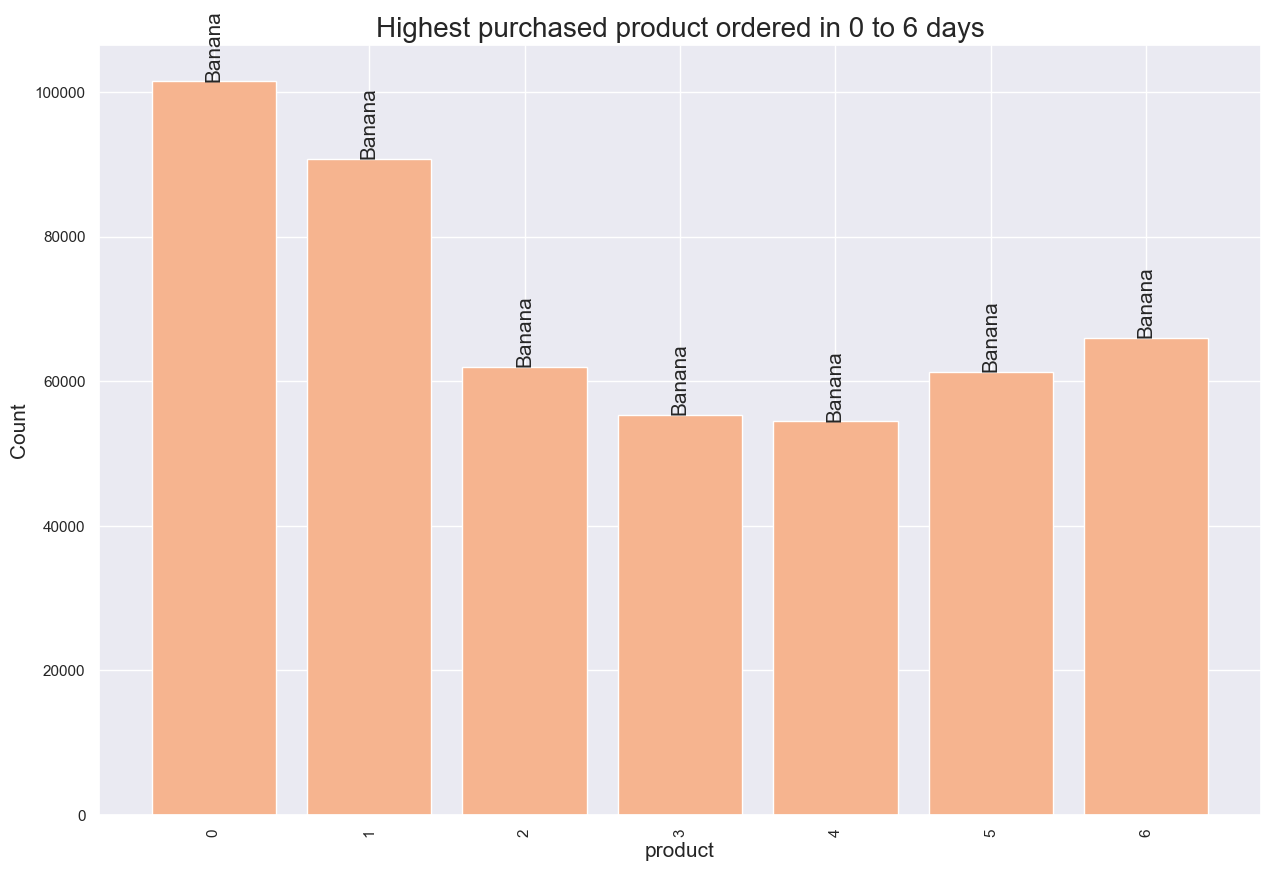

In [94]:
plt.figure(figsize=(15,10))
bar=plt.bar(day,count)
plt.title("Highest purchased product ordered in 0 to 6 days",fontsize=20)
plt.xlabel("product",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation='vertical')
i=0
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,product[i], ha='center', va='bottom',rotation=90,fontsize=15)
    i=i+1

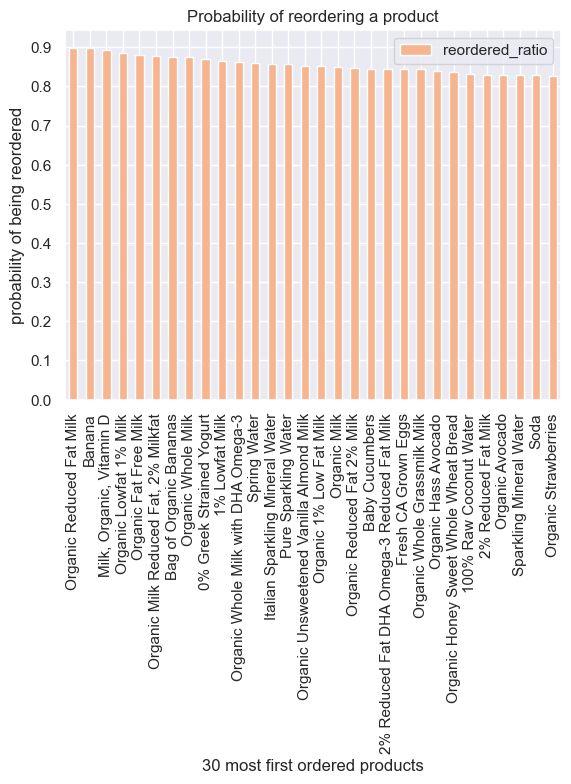

In [80]:
# For each product what is its probability to be reordered.
# We don't consider the first order of the user because 100% it won't contain any prev. ordered products.
non_first_orders_Mask = prior_train_orders['order_number'] != 1
groupeddf = prior_train_orders[non_first_orders_Mask].groupby('product_name').agg({'order_id':'count','reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio', 'order_id':'orders_count'})

# Filter products under 10000 order count
groupeddf = groupeddf[groupeddf['orders_count']>10000]
# Sort by the products having highest prob to be reordered
groupeddf = groupeddf.sort_values(by=['reordered_ratio'], ascending=False)

ax = groupeddf.iloc[:30].plot.bar(x='product_name', y='reordered_ratio')
plt.xlabel('30 most first ordered products')
plt.ylabel('probability of being reordered')
plt.xticks(rotation=90)
plt.title('Probability of reordering a product')
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
plt.show()

del non_first_orders_Mask

<Figure size 2000x500 with 0 Axes>

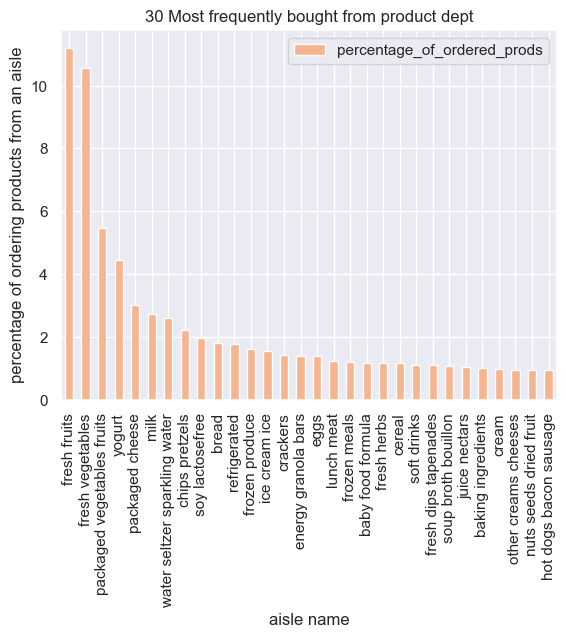

In [90]:
# From All ordered products, the count of contribution of each aisle
# Group by the count of ordering from an aisle
total_ordered_products = prior_train_orders.shape[0]
groupeddf = prior_train_orders.groupby(['aisle'], as_index=False).agg({'aisle_id':'count'}).rename(columns={'aisle_id':'count_of_ordered_prods'})
groupeddf['percentage_of_ordered_prods'] = groupeddf['count_of_ordered_prods']/total_ordered_products*100
groupeddf = groupeddf.sort_values(by=['count_of_ordered_prods'], ascending=False)
fig = plt.figure(figsize = (20, 5))
groupeddf.iloc[:30].plot.bar(x='aisle', y='percentage_of_ordered_prods')
plt.ylabel('percentage of ordering products')
plt.xlabel('aisle name')
plt.xticks(rotation=90)
plt.title('30 Most frequently bought from product dept')
plt.show()

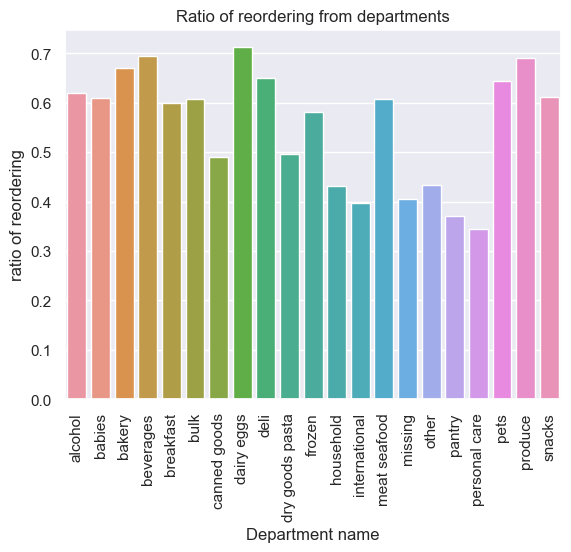

,department,reordered_ratio
7,dairy eggs,0.712287
3,beverages,0.695207
19,produce,0.691380
2,bakery,0.669671
8,deli,0.649702


In [92]:
# Heatmap on the propability of non-new users to reorder for each day each hour
non_first_orders = prior_train_orders['order_number'] != 1
groupeddf = prior_train_orders[non_first_orders].groupby(['department']).agg({'reordered':'mean'}).reset_index().rename(columns={'reordered':'reordered_ratio'})

groupeddf = groupeddf.sort_values(by=['reordered_ratio'], ascending=False)
sns.barplot(x='department', y='reordered_ratio', data=groupeddf)

plt.title('Ratio of reordering from departments')
plt.ylabel('ratio of reordering')
plt.xticks(rotation=90)
plt.xlabel('Department name')
plt.show()

groupeddf.head()